In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('Assignment 2 data.xlsx')
df.dropna(inplace=True)
df.head()

,date,TICKER,COMNAM,VOL,BID,ASK,SHROUT
0,2024-01-02,AAPL,APPLE INC,81752737.0,185.52000,185.53,15461896.0
1,2024-01-03,AAPL,APPLE INC,58136569.0,184.24001,184.25,15461896.0
2,2024-01-04,AAPL,APPLE INC,71280275.0,181.91000,181.92,15461896.0
3,2024-01-05,AAPL,APPLE INC,62064040.0,181.17000,181.19,15461896.0
4,2024-01-08,AAPL,APPLE INC,58748031.0,185.53999,185.55,15461896.0


In [5]:
df['spread'] = df['ASK'] - df['BID']
df['mid_price'] = (df['ASK'] + df['BID']) / 2
df['relative_spread'] = df['spread'] / df['mid_price']
df['volume_dollars'] = df['VOL'] * df['mid_price']
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
df.head()

,date,TICKER,COMNAM,VOL,BID,ASK,SHROUT,spread,mid_price,relative_spread,volume_dollars,week
0,2024-01-02,AAPL,APPLE INC,81752737.0,185.52000,185.53,15461896.0,0.01000,185.525000,0.000054,1.516718e+10,2024-01-01
1,2024-01-03,AAPL,APPLE INC,58136569.0,184.24001,184.25,15461896.0,0.00999,184.245005,0.000054,1.071137e+10,2024-01-01
2,2024-01-04,AAPL,APPLE INC,71280275.0,181.91000,181.92,15461896.0,0.01000,181.915000,0.000055,1.296695e+10,2024-01-01
3,2024-01-05,AAPL,APPLE INC,62064040.0,181.17000,181.19,15461896.0,0.02000,181.180000,0.000110,1.124476e+10,2024-01-01
4,2024-01-08,AAPL,APPLE INC,58748031.0,185.53999,185.55,15461896.0,0.01001,185.544995,0.000054,1.090040e+10,2024-01-08


## Question 1

In [6]:
df_gp = df.groupby(['COMNAM', 'TICKER'])[['relative_spread', 'spread']].mean()
df_gp

,,relative_spread,spread
COMNAM,TICKER,,
ALPS E T F TRUST,RDOG,0.003039,0.116071
APPLE INC,AAPL,0.000138,0.029362
DIGITAL ALLY INC NEW,DGLY,0.023903,0.043142
HIBBETT SPORTS INC,HIBB,0.001036,0.077730
INDIVIOR PLC,INDV,0.002604,0.040833
RAPID7 INC,RPD,0.000797,0.034444
TESLA INC,TSLA,0.000229,0.053095


## Question 2

In [7]:
grouped = df.groupby(['COMNAM', 'TICKER'])

mean_relative_spread = grouped['relative_spread'].mean().rename('mean_relative_spread')
mean_spread = grouped['spread'].mean().rename('mean_spread')
mean_volume = grouped['volume_dollars'].mean().rename('mean_volume')
volatility = grouped['mid_price'].std().rename('volatility')

# Combine all metrics into a single DataFrame
metrics = pd.concat([mean_relative_spread, mean_spread, mean_volume, volatility], axis=1)

# Sort by mean_relative_spread in descending order
metrics = metrics.sort_values(by='mean_relative_spread', ascending=False)
metrics = metrics.reset_index()

metrics


,COMNAM,TICKER,mean_relative_spread,mean_spread,mean_volume,volatility
0,DIGITAL ALLY INC NEW,DGLY,0.023903,0.043142,6.381854e+05,0.766581
1,ALPS E T F TRUST,RDOG,0.003039,0.116071,4.261018e+04,2.353338
2,INDIVIOR PLC,INDV,0.002604,0.040833,6.688500e+06,4.156526
3,HIBBETT SPORTS INC,HIBB,0.001036,0.077730,3.382624e+07,8.210670
4,RAPID7 INC,RPD,0.000797,0.034444,3.558597e+07,7.310195
5,TESLA INC,TSLA,0.000229,0.053095,2.195094e+10,70.986306
6,APPLE INC,AAPL,0.000138,0.029362,1.154748e+10,25.527327


Apple and Tesla are the 3 companies with significantly lower spreads. Indeed, they both have much larger volumes with an average daily trade greater than $10Bn. Surprisingly, these companies have the most volatile stocks, but the liquidity compensates for it in tightening the spreads.

Similarly, the 2 instruments with the lowest daily volume, namely DGLY & RDOG, have the 2 largest relative spreads. Surprisingly, DGLY has a much larger spread then RDOG. One possible reason could be that since one is a micro cap stock which leads to wider spreads as there is less liquidity on the market, the last comer has to pay a higher price; and the other, RDOG is an ETF whose value is linked too more liquid assets, and it could then be possible to replicate synthetically the value of the ETF to make a market on the instrument, thus reducing its spread.

Finally, the 3 other stocks are small cap stocks with a market cap of $1Bn to $1.5Bn. All 3 have comparable spreads and daily volumes.

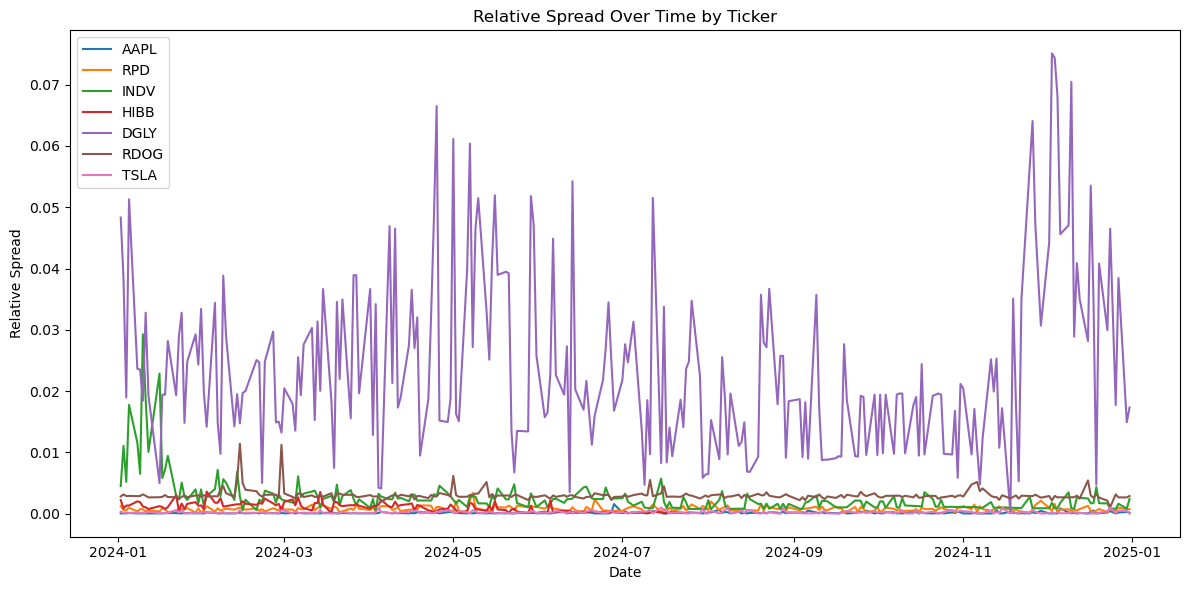

In [8]:
plt.figure(figsize=(12, 6))

for ticker in df['TICKER'].unique():
    ticker_data = df[df['TICKER'] == ticker].copy()
    ticker_data = ticker_data[['date', 'COMNAM', 'TICKER', 'relative_spread', 'spread', 'volume_dollars']]
    plt.plot(ticker_data['date'], ticker_data['relative_spread'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Relative Spread')
plt.title('Relative Spread Over Time by Ticker')
plt.legend()
plt.tight_layout()
plt.show()


Min relative spread for AAPL: 0.000000 on 2024-07-16 && Max relative spread for AAPL: 0.0016 on 2024-06-28
Min relative spread for RPD : 0.000174 on 2024-01-29 && Max relative spread for RPD: 0.0034 on 2024-05-08
Min relative spread for INDV: 0.000455 on 2024-04-03 && Max relative spread for INDV: 0.0293 on 2024-01-10
Min relative spread for HIBB: 0.000114 on 2024-07-23 && Max relative spread for HIBB: 0.0036 on 2024-02-02
Min relative spread for DGLY: 0.000179 on 2024-11-18 && Max relative spread for DGLY: 0.0751 on 2024-12-03
Min relative spread for RDOG: 0.001056 on 2024-12-24 && Max relative spread for RDOG: 0.0114 on 2024-02-14
Min relative spread for TSLA: 0.000021 on 2024-12-17 && Max relative spread for TSLA: 0.0010 on 2024-12-24


/home/everyday/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


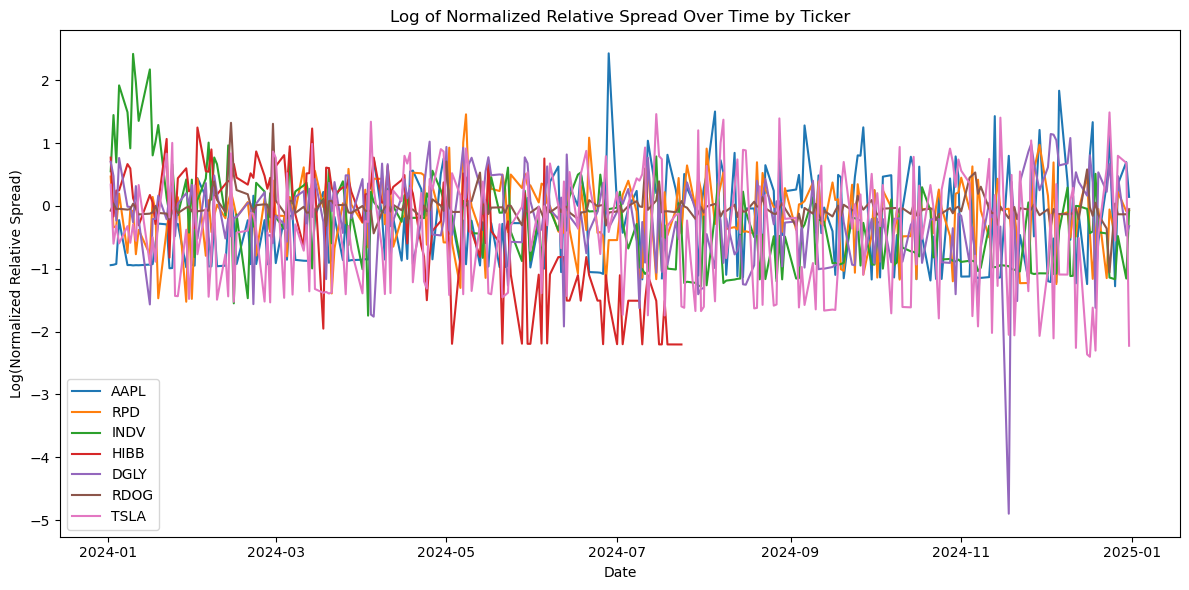

In [9]:
# Reset index so TICKER becomes a column (if not already)


plt.figure(figsize=(12, 6))

for ticker in df['TICKER'].unique():
    ticker_data = df[df['TICKER'] == ticker].copy()
    ticker_data = ticker_data[['date', 'COMNAM', 'TICKER', 'relative_spread', 'spread', 'volume_dollars']]
    
    mean_rel_spread = metrics.loc[metrics['TICKER'] == ticker, 'mean_relative_spread'].values
    if len(mean_rel_spread) == 0:
        continue
    mean_rel_spread = float(mean_rel_spread[0])
    
    
    max_row = ticker_data.loc[ticker_data['relative_spread'].idxmax()]
    max_date = max_row['date']
    max_spread = max_row['relative_spread']

    min_row = ticker_data.loc[ticker_data['relative_spread'].idxmin()]
    min_date = min_row['date']
    min_spread = min_row['relative_spread']
    print(f"Min relative spread for {ticker}{(4-len(ticker)) * ' '}: {min_spread:.6f} on {min_date.date()} && Max relative spread for {ticker}: {max_spread:.4f} on {max_date.date()}")

    # Normalize and take log
    normalized_spread = ticker_data['relative_spread'] / mean_rel_spread
    ticker_data['log_relative_spread'] = np.log(normalized_spread)  # use np.log10() for base-10
    
    # Plot
    plt.plot(ticker_data['date'], ticker_data['log_relative_spread'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Log(Normalized Relative Spread)')
plt.title('Log of Normalized Relative Spread Over Time by Ticker')
plt.legend()
plt.tight_layout()
plt.show()

16/07/2024: all-time high of Apple, trading spreads are at the lowest

24/12/2024 TSLA: local peak. Corresponds to the lowest volume cf xl.
08/05/2024 RPD:

Overall very hard to explain spreads only by volume as for HIBB the maximum spread corresponds to a local maximum of volume, indicating more trade size. However because of the upward trend for the price, it probably leads to an unbalanced inventory for market makers who have to widen their spreads to adapt to it.

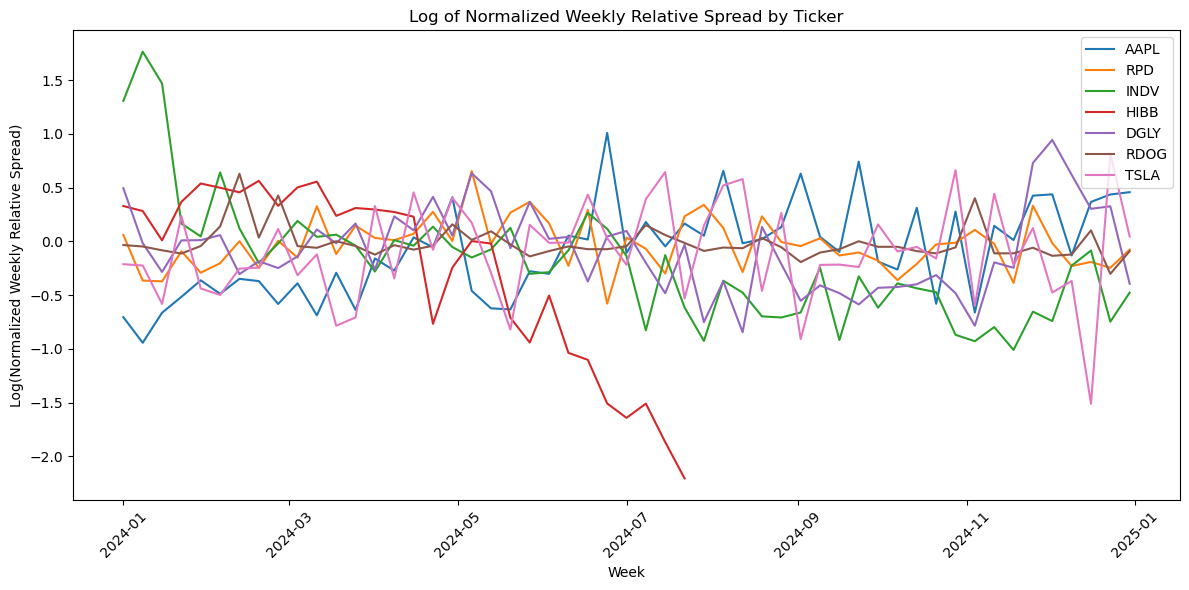

In [10]:
# Group by TICKER and week, then average
weekly_avg = df.groupby(['TICKER', 'week'])[['relative_spread', 'spread', 'volume_dollars']].mean().reset_index()

# Optional: also compute volatility (std dev) per week
weekly_vol = df.groupby(['TICKER', 'week'])['mid_price'].std().reset_index(name='volatility')

# Merge everything
weekly_metrics = pd.merge(weekly_avg, weekly_vol, on=['TICKER', 'week'])

# Sort by week (and maybe TICKER for plotting)
weekly_metrics = weekly_metrics.sort_values(by=['TICKER', 'week'])

plt.figure(figsize=(12, 6))

for ticker in df['TICKER'].unique():
    # Filter weekly data for this ticker
    ticker_weekly = weekly_metrics[weekly_metrics['TICKER'] == ticker].copy()
    
    # Retrieve the mean_relative_spread for normalization
    mean_rel_spread = metrics.loc[metrics['TICKER'] == ticker, 'mean_relative_spread'].values
    if len(mean_rel_spread) == 0:
        continue
    mean_rel_spread = float(mean_rel_spread[0])
    
    # Normalize and log-transform the weekly relative_spread
    normalized_spread = ticker_weekly['relative_spread'] / mean_rel_spread
    ticker_weekly['log_relative_spread'] = np.log(normalized_spread.replace(0, np.nan))  # avoid log(0)
    
    # Plot
    plt.plot(ticker_weekly['week'], ticker_weekly['log_relative_spread'], label=ticker)

plt.xlabel('Week')
plt.ylabel('Log(Normalized Weekly Relative Spread)')
plt.title('Log of Normalized Weekly Relative Spread by Ticker')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()